In [1]:
from keras import optimizers
import tensorflow as tf
from PIL import Image, ImageOps
import numpy as np
import cv2

In [3]:
agemodel_loaded= tf.keras.models.load_model(r"./Models/ageModel.h5")
genmodel_loaded=tf.keras.models.load_model(r"./Models/genderModel.h5")

In [8]:
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200,200), Image.Resampling.LANCZOS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.Resampling.LANCZOS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.Resampling.LANCZOS)
            
    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 3)
    
    age = agemodel_loaded.predict(ar)
    gender = np.round(genmodel_loaded.predict(ar))
    if gender == 0:
        gender = 'male'
    elif gender == 1:
        gender = 'female'
        
    print('Age:', int(age), '\n Gender:', gender)
    return im.resize((200,200), Image.Resampling.LANCZOS)

In [25]:
imagePath="./40_0.jpg"

1/1 [==============================] - 0s 49ms/step
Age: 35 
 Gender: male


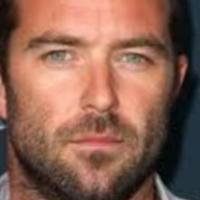

In [26]:
process_and_predict(imagePath)